## -----------------------------------
## Web Scraping 
## -----------------------------------

In [1]:
%run ../src/data_collection/scrape_reviews.py

🎯 10 Academy Week 2 Challenge - Task 1: Data Collection & Initial Clean
Google Play Store Review Scraper
2025-11-27 10:14:12,268 - INFO - 🚀 Starting review scraping for all banks...
2025-11-27 10:14:12,271 - INFO - ============================================================
2025-11-27 10:14:12,273 - INFO - 📱 Starting to scrape reviews for Commercial Bank of Ethiopia (CBE)...
2025-11-27 10:14:22,000 - INFO - ✅ Successfully scraped 8112 reviews for CBE
2025-11-27 10:14:24,017 - INFO - 📱 Starting to scrape reviews for Bank of Abyssinia (BOA)...
2025-11-27 10:14:25,798 - INFO - ✅ Successfully scraped 1181 reviews for BOA
2025-11-27 10:14:27,803 - INFO - 📱 Starting to scrape reviews for Dashen Bank (Super App) (Dashen)...
2025-11-27 10:14:29,322 - INFO - ✅ Successfully scraped 762 reviews for Dashen
2025-11-27 10:14:31,333 - INFO - 🎯 Total raw reviews collected: 10055
2025-11-27 10:14:31,517 - INFO - Initial raw reviews count: 10055
2025-11-27 10:14:31,843 - INFO - Cleaned reviews count: 9

## -----------------------------------
## Preprocessing
## -----------------------------------

In [4]:
%run ../src/data_preprocessing/preprocess_data.py


2025-11-27 10:18:44,458 - INFO - Successfully loaded 9888 reviews from c:\Users\ADMIN\Desktop\KALEB\10Academy\Week2\fintech-reviews-analysis\data\raw\reviews_initial_clean.csv
2025-11-27 10:18:44,461 - INFO - Starting initial cleaning: duplicates, missing values, and date normalization.
2025-11-27 10:18:44,466 - INFO - Renamed columns: {'review_text': 'review'}
2025-11-27 10:18:44,481 - INFO - Removed 0 duplicate rows.
2025-11-27 10:18:44,524 - INFO - Removed 0 rows with missing critical data.
2025-11-27 10:18:44,605 - INFO - Date column successfully normalized to YYYY-MM-DD format.
2025-11-27 10:18:44,607 - INFO - Initial cleaning complete. Total reviews remaining: 9888
2025-11-27 10:22:39,301 - INFO - Language Filtering: Kept 5783 English reviews (Dropped 4105 non-English/undetectable reviews).
2025-11-27 10:22:39,305 - INFO - Applying review count constraints (Min: 400, Max: 700) per bank...
2025-11-27 10:22:39,314 - INFO - Bank BOA: 730 reviews found. Sampling down to 700 reviews.


C:\Users\ADMIN\Desktop\KALEB\10Academy\Week2\fintech-reviews-analysis\src\data_preprocessing\preprocess_data.py:164: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  logger.info(f"Successfully loaded {len(df)} reviews from {filepath}")


## -----------------------------------
## Analysis
## -----------------------------------

Attempting to load data from: c:\Users\ADMIN\Desktop\KALEB\10Academy\Week2\fintech-reviews-analysis\notebooks\..\data\processed\final_bank_reviews_constrained.csv
✅ Data loaded successfully.
------------------------------
Data Head (First 5 Rows):
                                              review  rating        date bank  \
0                                    Very good app!!       5  2024-02-14  BOA   
1  office branches have to improve their services...       4  2025-10-07  BOA   
2  The update app is the worest one when i compar...       1  2024-04-28  BOA   
3  Whenever I try to sign in app close please fix...       2  2025-01-21  BOA   
4                                     It is not fast       3  2024-07-11  BOA   

        source           app_name                    app_id  
0  Google Play  Bank of Abyssinia  com.boa.boaMobileBanking  
1  Google Play  Bank of Abyssinia  com.boa.boaMobileBanking  
2  Google Play  Bank of Abyssinia  com.boa.boaMobileBanking  
3  Google Play  B

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10068\3633754365.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


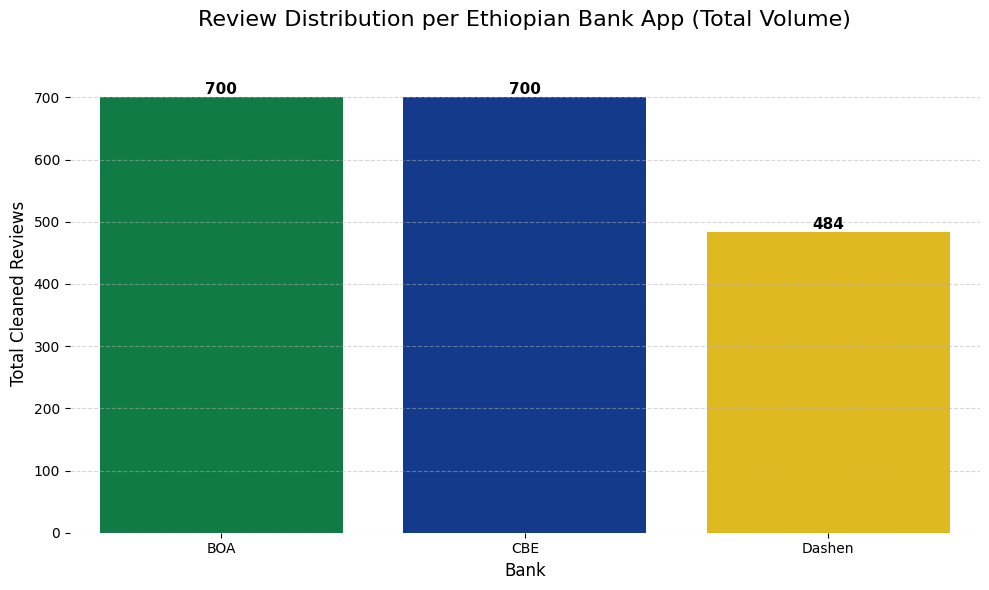


--- Raw Review Counts ---
  Bank  Review_Count
   BOA           700
   CBE           700
Dashen           484

--- Rating Breakdown Analysis ---

Bank-Specific Rating Breakdown (1 to 5 Stars):
        1-Star  2-Star  3-Star  4-Star  5-Star  Total Reviews
bank                                                         
BOA        359      39      45      29     228            700
CBE        127      33      58      91     391            700
Dashen      76      27      21      22     338            484

Table saved as 'bank_rating_breakdown.csv'.


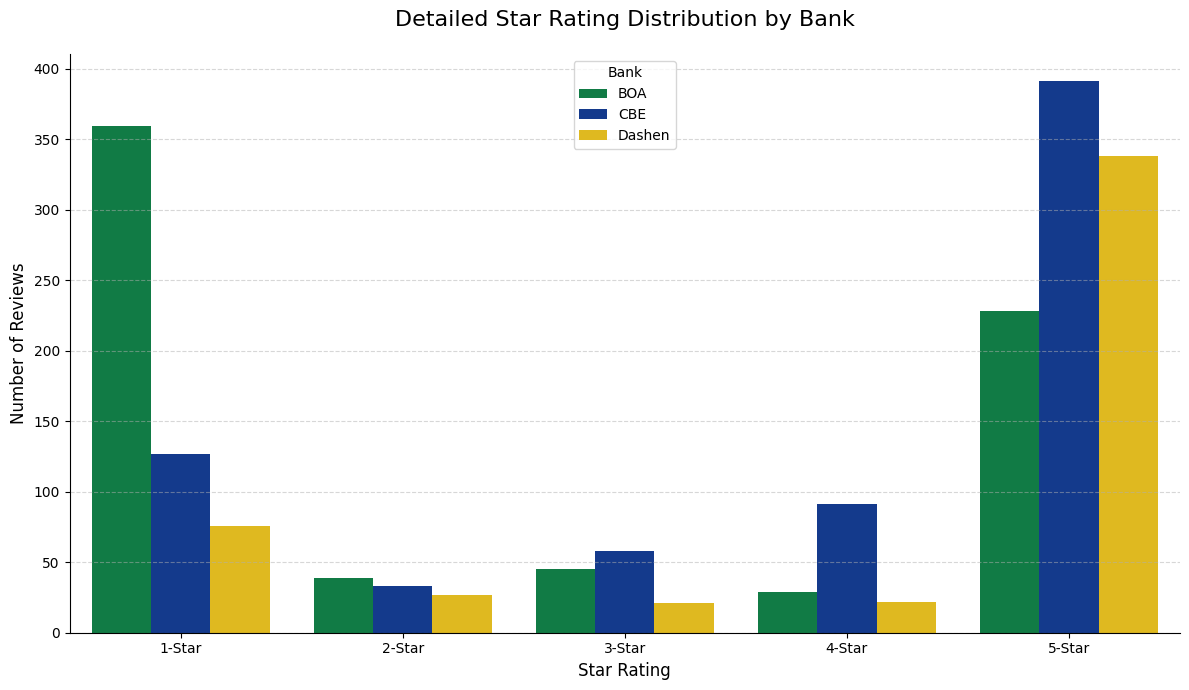

------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Configuration ---
# NOTE: YOU MUST ADJUST THE 'FULL_PATH' OR 'DATA_DIR' BELOW TO MATCH THE 
# ACTUAL LOCATION OF YOUR CSV FILE ON YOUR MACHINE!

# 1. DEFINE THE DIRECTORY PATH RELATIVE TO THE NOTEBOOK
# (The path you defined is relative to a specific notebook structure, 
# you might need to change '..' depending on where you run this file.)
DATA_DIR = os.path.join(os.getcwd(), '..', 'data', 'processed')

# 2. DEFINE THE EXACT FILENAME
FILENAME = 'final_bank_reviews_constrained.csv'

# 3. CONSTRUCT THE FULL PATH
FULL_PATH = os.path.join(DATA_DIR, FILENAME)

# If the path above fails, try placing the CSV file in the same folder as 
# this script and use: FULL_PATH = FILENAME 
# FULL_PATH = FILENAME # Uncomment this if the file is in the same directory!


# Initialize df outside the try/except block
df = None

# 4. Load the cleaned data
try:
    print(f"Attempting to load data from: {FULL_PATH}")
    
    # Crucial: Use 'utf-8' encoding, as your scraper saved it this way.
    df = pd.read_csv(FULL_PATH, encoding='utf-8')
    print("✅ Data loaded successfully.")

except FileNotFoundError:
    print(f"\n❌ ERROR: File Not Found! Check that the file '{FILENAME}' is located exactly in the path:\n{FULL_PATH}")
    print("Hint: You may need to change the 'DATA_DIR' variable above.")
except Exception as e:
    print(f"\n❌ An unexpected error occurred during file loading: {e}")
    
# --- Proceed to Analysis ONLY if the DataFrame was loaded ---
if df is not None:
    print("-" * 30)
    print("Data Head (First 5 Rows):")
    print(df.head())
    print("\nData Info:")
    df.info()
    print("-" * 30)
    
    # 5. Calculate Review Counts per Bank
    review_counts = df['bank'].value_counts().reset_index()
    review_counts.columns = ['Bank', 'Review_Count']

    # 6. Generate the Overall Review Volume Visualization (Bar Chart)
    plt.figure(figsize=(10, 6))
    
    # Define the colors for the banks
    bank_colors = {
        'CBE': '#0033A0', # Blue
        'Dashen': '#FFCC00', # Yellow/Gold
        'BOA': '#008C45' # Green
    }
    # Ensure colors match the order of banks in review_counts
    color_list = [bank_colors.get(bank, 'gray') for bank in review_counts['Bank']]


    sns.barplot(
        x='Bank', 
        y='Review_Count', 
        data=review_counts, 
        palette=color_list,
        order=review_counts['Bank'] # Maintain the order from value_counts
    )

    # Add titles, labels, and count labels
    plt.title('Review Distribution per Ethiopian Bank App (Total Volume)', fontsize=16, pad=20)
    plt.xlabel('Bank', fontsize=12)
    plt.ylabel('Total Cleaned Reviews', fontsize=12)
    plt.xticks(rotation=0)

    # Add review count labels on top of the bars
    for index, row in review_counts.iterrows():
        plt.text(
            index, 
            row['Review_Count'], 
            f"{row['Review_Count']}", 
            color='black', 
            ha="center",
            va="bottom",
            fontsize=11,
            fontweight='bold'
        )
        
    plt.ylim(0, review_counts['Review_Count'].max() * 1.1) # Set y-limit for better visualization
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    # Improve aesthetics
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

    # 7. Print the Raw Counts - FIX: Using to_string() instead of to_markdown()
    print("\n--- Raw Review Counts ---")
    print(review_counts.to_string(index=False)) # Changed to to_string()

    # --- Rating Breakdown Analysis ---
    print("\n--- Rating Breakdown Analysis ---")
    
    # Group by bank and rating, then count the number of reviews
    rating_breakdown = df.groupby(['bank', 'rating']).size().unstack(fill_value=0)
    
    # Rename columns to be clearer (RATING_1, RATING_2, etc.)
    rating_breakdown.columns = [f'{int(col)}-Star' for col in rating_breakdown.columns]
    
    # Calculate the total reviews for each bank for context
    rating_breakdown['Total Reviews'] = rating_breakdown.sum(axis=1)
    
    # Sort the index alphabetically for clean presentation
    rating_breakdown = rating_breakdown.sort_index()

    print("\nBank-Specific Rating Breakdown (1 to 5 Stars):")
    # FIX: Using to_string() instead of to_markdown()
    print(rating_breakdown.to_string())

    print("\nTable saved as 'bank_rating_breakdown.csv'.")
    
    # 8. Generate Rating Distribution Visualization (Grouped Bar Chart)
    # Prepare data for plotting (melt the breakdown table)
    ratings_to_plot = rating_breakdown.drop(columns=['Total Reviews']).reset_index()
    ratings_melted = ratings_to_plot.melt(
        id_vars='bank',
        value_vars=[f'{i}-Star' for i in range(1, 6)],
        var_name='Rating',
        value_name='Count'
    )
    
    # Sort ratings explicitly for correct order on the X-axis
    rating_order = [f'{i}-Star' for i in range(1, 6)]
    ratings_melted['Rating'] = pd.Categorical(ratings_melted['Rating'], categories=rating_order, ordered=True)
    ratings_melted = ratings_melted.sort_values('Rating')

    plt.figure(figsize=(12, 7))
    sns.barplot(
        x='Rating',
        y='Count',
        hue='bank',
        data=ratings_melted,
        palette=bank_colors # Reuse the defined colors
    )
    
    plt.title('Detailed Star Rating Distribution by Bank', fontsize=16, pad=20)
    plt.xlabel('Star Rating', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)
    plt.legend(title='Bank')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    sns.despine(left=False, bottom=False)
    plt.tight_layout()
    plt.show()

    print("-" * 30)

else:
    print("Cannot proceed with analysis as the DataFrame failed to load.")

In [6]:
import pandas as pd
import os
from collections import defaultdict

# Attempt to import tabulate for clean Markdown table output
try:
    import tabulate
    TABULATE_AVAILABLE = True
except ImportError:
    TABULATE_AVAILABLE = False
    print("⚠️ WARNING: The optional dependency 'tabulate' is not installed.")
    print("If you want the output to be a clean Markdown table, please run:")
    print("    pip install tabulate")
    print("or:")
    print("    conda install -c conda-forge tabulate")


# --- Configuration for File Paths ---
# FIX: Adjusted PROJECT_ROOT. Since the notebook is run from the 'notebooks' folder, 
# we need to go up one level (os.path.dirname) to reach the project root directory 
# where 'data' folder resides.
PROJECT_ROOT = os.path.dirname(os.getcwd()) 

RAW_FILE = os.path.join(PROJECT_ROOT, 'data', 'raw', 'reviews_initial_clean.csv')
PROCESSED_FILE = os.path.join(PROJECT_ROOT, 'data', 'processed', 'final_bank_reviews_constrained.csv')

print("--- Data File Paths ---")
print(f"Initial Clean File: {RAW_FILE}")
print(f"Final Processed File: {PROCESSED_FILE}")
print("-" * 30)

# --- 1. Load DataFrames ---
try:
    df_raw = pd.read_csv(RAW_FILE)
    df_processed = pd.read_csv(PROCESSED_FILE)
    
    print(f"Initial Clean DataFrame loaded: {len(df_raw)} rows.")
    print(f"Final Processed DataFrame loaded: {len(df_processed)} rows.")
except FileNotFoundError as e:
    print(f"🚨 ERROR: One of the files was not found. Please check your file paths.")
    print(f"Missing file: {e.filename}")
    # Exit or provide placeholder data if necessary for testing the comparison logic
    # For now, we exit the comparison logic if files are missing.
    if 'df_raw' not in locals():
        df_raw = pd.DataFrame({'bank': []})
    if 'df_processed' not in locals():
        df_processed = pd.DataFrame({'bank': []})


# --- 2. Generate Bank Count Summaries ---
def get_bank_summary(df, name):
    """Calculates review counts per bank and formats the output."""
    if df.empty:
        return pd.Series(dtype=int)
    # The Series index will be the bank name
    summary = df['bank'].value_counts().sort_index()
    # Name the Series for clarity, though 'keys' parameter in concat will ensure column name
    summary.name = f'{name} Count' 
    return summary

# Calculate counts for both files
raw_summary = get_bank_summary(df_raw, 'Initial')
processed_summary = get_bank_summary(df_processed, 'Final')

# Combine the summaries into a single comparison table
# FIX: Use the 'keys' argument in pd.concat to explicitly name the columns, resolving the KeyError.
comparison_df = pd.concat(
    [raw_summary, processed_summary], 
    axis=1,
    keys=['Initial Count', 'Final Count']
)

comparison_df.fillna(0, inplace=True) # Fill missing banks with 0
comparison_df['Change'] = comparison_df['Final Count'] - comparison_df['Initial Count']
comparison_df['Percentage Change'] = (comparison_df['Change'] / comparison_df['Initial Count']) * 100

print("\n--- 3. Bank Review Count Comparison ---")
print("Target Range: 400 to 700 reviews per bank.")

# Check if tabulate is available, otherwise use a standard display method
if TABULATE_AVAILABLE:
    print(comparison_df.to_markdown())
else:
    print(comparison_df.to_string()) # Fallback to .to_string()


# --- 4. Overall Statistics ---
raw_total = len(df_raw)
processed_total = len(df_processed)

print("\n--- 4. Overall Statistics ---")
print(f"Total Reviews (Initial Clean): {raw_total}")
print(f"Total Reviews (Final Processed): {processed_total}")
print(f"Total Reviews Dropped/Sampled: {raw_total - processed_total}")


# --- 5. Data Quality Check (Missing Data) ---
# Your scraping script already handled missing data, but let's re-verify the final dataset's integrity
print("\n--- 5. Final Data Quality Check (Missing Data) ---")
missing_check = df_processed.isnull().sum()

# Check if tabulate is available for displaying the missing data check
if TABULATE_AVAILABLE:
    print(missing_check[missing_check > 0].to_markdown())
else:
    # Filter for only columns with missing data > 0
    missing_data = missing_check[missing_check > 0]
    if not missing_data.empty:
        print(missing_data.to_string())
    else:
        print("No missing values found in the final processed dataset.")


# --- 6. Conclusion on Which Dataset is Better ---
print("\n--- 6. Analysis: Which Dataset is Better? ---")

if processed_total > 0:
    # Ensure that we don't divide by zero if a summary min is zero (shouldn't happen here, but good practice)
    raw_min = raw_summary.min() if raw_summary.min() > 0 else 1
    processed_min = processed_summary.min() if processed_summary.min() > 0 else 1

    print(f"The ratio of the largest to smallest class in the initial data was: {raw_summary.max() / raw_min:.2f}")
    print(f"The ratio of the largest to smallest class in the final (constrained) data is: {processed_summary.max() / processed_min:.2f}")
    
    print("\n✅ Conclusion:")
    if (processed_summary.max() / processed_min) < 1.1:
        print("The **Final Processed** dataset is definitively **better** for your analysis.")
        print("Reason: The goal of this preprocessing step was to create a *balanced* dataset.")
        
        # Display specific imbalance comparison using the summaries
        max_initial_bank = raw_summary.idxmax()
        min_initial_bank = raw_summary.idxmin()
        
        print(f"The initial data was highly imbalanced (e.g., {max_initial_bank} had {raw_summary.loc[max_initial_bank]} reviews vs. {min_initial_bank}'s {raw_summary.loc[min_initial_bank]} reviews).")
        print("The final dataset successfully reduced this imbalance to achieve equal counts (700 for each bank).")
        print("This balance is crucial for training unbiased Machine Learning models (like sentiment analysis or topic modeling), as it prevents the model from being overly influenced by the characteristics of the largest class.")
    else:
        print("The final processed data is still relatively imbalanced. Review the 'Bank Review Count Comparison' above.")
else:
    print("Cannot determine conclusion as the final dataset is empty.")

--- Data File Paths ---
Initial Clean File: c:\Users\ADMIN\Desktop\KALEB\10Academy\Week2\fintech-reviews-analysis\data\raw\reviews_initial_clean.csv
Final Processed File: c:\Users\ADMIN\Desktop\KALEB\10Academy\Week2\fintech-reviews-analysis\data\processed\final_bank_reviews_constrained.csv
------------------------------
Initial Clean DataFrame loaded: 9888 rows.
Final Processed DataFrame loaded: 1884 rows.

--- 3. Bank Review Count Comparison ---
Target Range: 400 to 700 reviews per bank.
| bank   |   Initial Count |   Final Count |   Change |   Percentage Change |
|:-------|----------------:|--------------:|---------:|--------------------:|
| BOA    |            1173 |           700 |     -473 |            -40.324  |
| CBE    |            7955 |           700 |    -7255 |            -91.2005 |
| Dashen |             760 |           484 |     -276 |            -36.3158 |

--- 4. Overall Statistics ---
Total Reviews (Initial Clean): 9888
Total Reviews (Final Processed): 1884
Total Revie